In [2]:
import matplotlib.pyplot as plt
import hopsy
import os
import numpy as np
from scipy.optimize import fsolve
import pandas as pd
from scipy.optimize import curve_fit
from PolyRound.api import PolyRoundApi

In [3]:
class Boltzman_Modell:
    def __init__(self, beta, index):
        self.beta = beta
        self.index = index
        
    def compute_negative_log_likelihood(self, x):
        return - self.beta * x[self.index]

In [4]:
class Normal_Modell:
    def __init__(self, mu, sigma, index):
        self.mu = mu
        self.index = index
        self.sigma = sigma
        
    def compute_negative_log_likelihood(self, x):
        return 0.5 * (x[self.index]-self.mu)**2/(self.sigma**2)

In [18]:
model_path = os.path.join("C:/Users/carol/OneDrive/Desktop/Juelich", "iEZ481_Glc.xml")
print(model_path)

C:/Users/carol/OneDrive/Desktop/Juelich\iEZ481_Glc.xml


In [19]:
raw_polytope = PolyRoundApi.sbml_to_polytope(model_path)
print(raw_polytope.A)

Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h_c "h[c]">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h_e "h[e]">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_atp_c "atp[c]">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glc_D_c "glc-D[c]">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adp_c "adp[c]">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_g6p_c "g6p[c]">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_f6p_c "f6p[c]">
Use of FORMULA in t

                                  glk  pgi  pfkA  fbp  fda  tpiA  gapA  gapB  \
fb0e2c78f4db437385b0a326662e8430  1.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   
2ab7aa99f04e45ba8f3415a0fd3296ed  0.0  1.0   0.0  0.0  0.0   0.0   0.0   0.0   
20a7a3eab4364a68a2109a644e5fab52  0.0  0.0   1.0  0.0  0.0   0.0   0.0   0.0   
d3f31ac4478e448fa2d02747f71ffce9  0.0  0.0   0.0  1.0  0.0   0.0   0.0   0.0   
da5fa084b8fe4d699104a1c4c678b903  0.0  0.0   0.0  0.0  1.0   0.0   0.0   0.0   
...                               ...  ...   ...  ...  ...   ...   ...   ...   
231995d6a41a4bfba1926b5f699497bc  0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   
e4211ea3f0ff46a58a9f73bd915b5507  0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   
928cf82ee8694afb956b2bd23405f59b  0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   
a6ea37bcd63a41ce919bacfb98574f45  0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   
5fe9b84c0e99416b992f9ff72d1be054  0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   

                                  pgk  

In [20]:
biomass_index = raw_polytope.A.columns.tolist().index('biomass_a')
polytope = PolyRoundApi.simplify_transform_and_round(raw_polytope)

In [21]:
uniform = hopsy.Problem(A=polytope.A, b=polytope.b, transformation=polytope.transformation, shift=polytope.shift)
starting_point = hopsy.compute_chebyshev_center(uniform)

In [23]:
# Für die Boltzmann-Verteilung
a = np.array(0)
model_Boltzmann = Boltzman_Modell(a, biomass_index)
uniform_2 = hopsy.Problem(A=polytope.A, b=polytope.b, model = model_Boltzmann, transformation=polytope.transformation, shift=polytope.shift)
starting_point_2 = hopsy.compute_chebyshev_center(uniform_2)

In [24]:
# Für die Boltzmann-Verteilung
a = np.array(10)
model_Boltzmann = Boltzman_Modell(a, biomass_index)
boltzmann_1 = hopsy.Problem(A=polytope.A, b=polytope.b, model = model_Boltzmann, transformation=polytope.transformation, shift=polytope.shift)
starting_point_boltzmann = hopsy.compute_chebyshev_center(boltzmann_1)

In [25]:
# Für die Boltzmann-Verteilung
a = np.array(-10)
model_Boltzmann = Boltzman_Modell(a, biomass_index)
boltzmann_2 = hopsy.Problem(A=polytope.A, b=polytope.b, model = model_Boltzmann, transformation=polytope.transformation, shift=polytope.shift)
starting_point_boltzmann_2 = hopsy.compute_chebyshev_center(boltzmann_2)

In [26]:
# Für die Boltzmann-Verteilung
a = np.array(-100)
model_Boltzmann = Boltzman_Modell(a, biomass_index)
boltzmann_3 = hopsy.Problem(A=polytope.A, b=polytope.b, model = model_Boltzmann, transformation=polytope.transformation, shift=polytope.shift)
starting_point_boltzmann_3 = hopsy.compute_chebyshev_center(boltzmann_3)

In [27]:
# Für die Normal-Verteilung
mu = np.array(1)
sigma = np.array(50)
model_normal = Normal_Modell(mu, sigma, biomass_index)


In [28]:
normal = hopsy.Problem(A=polytope.A, b=polytope.b, model = model_normal, transformation=polytope.transformation, shift=polytope.shift)
starting_point_normal_3 = hopsy.compute_chebyshev_center(normal)

In [29]:
problems = {
    'uniform': [uniform, starting_point],
    'beta=0': [uniform_2, starting_point_2],  
    'beta=10': [boltzmann_1, starting_point_boltzmann], 
     'beta=-10': [boltzmann_2, starting_point_boltzmann_2], 
     'beta = -100': [boltzmann_3, starting_point_boltzmann_3],
     'normal':[normal, starting_point_normal_3]
    }

In [30]:
rhat = {}
ess = {}
samples = {}
acceptance_rate = {}
n_chains = 4 
n_samples = 10000
thinning = 10

for p, liste in problems.items():
    v = liste[0]
    s = liste[1]
    print(p)
    proposal = hopsy.UniformCoordinateHitAndRunProposal(v, starting_point=s)
    mcs = [hopsy.MarkovChain(problem=v, proposal=proposal) for i in range(n_chains)]
    rngs = [hopsy.RandomNumberGenerator(i) for i in range(n_chains)]
    acceptance_rate[p], samples[p] = hopsy.sample(mcs, rngs, n_samples=n_samples, thinning=thinning, n_procs=1)
    ess[p] = hopsy.ess(samples[p])
    print('\tess', np.min(ess[p]))
    rhat[p] = hopsy.rhat(samples[p])
    print('\trhat', np.max(rhat[p]))

uniform
	ess 23.848584199625712
	rhat 1.1300518090337996
beta=0
	ess 23.848584199625712
	rhat 1.1300518090337996
beta=10
	ess 23.035622938498424
	rhat 1.1353788738035213
beta=-10
	ess 20.64649467542741
	rhat 1.1556451752473578
beta = -100
	ess 20.994741181320983
	rhat 1.1350324379893058
normal
	ess 23.848584199625712
	rhat 1.1300518090337996


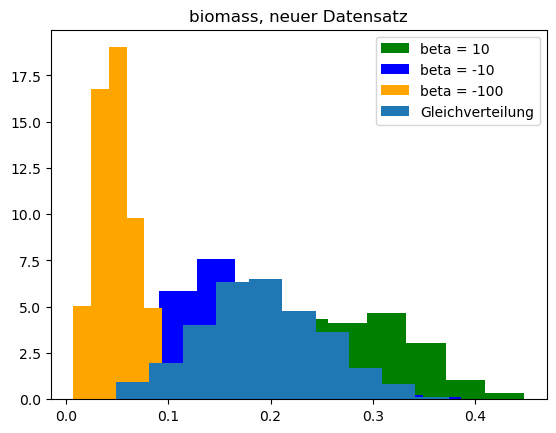

In [36]:
plt.title('biomass, neuer Datensatz')
#plt.hist(samples['uniform'][0, :, biomass_index], density = True, label = "Gleich")
# TODO
#plt.hist(samples['beta=0'][0, :, biomass_index], density = True, color = "red",label = "beta = 0" )
plt.hist(samples['beta=10'][0, :, biomass_index], density = True, color = "green", label = "beta = 10")
plt.hist(samples['beta=-10'][0, :, biomass_index], density = True, color = "blue", label = "beta = -10")
plt.hist(samples['beta = -100'][0, :, biomass_index], density = True, color = "orange", label = "beta = -100")
#plt.hist(samples['normal'][0, :, biomass_index], density = True, color = "yellow", label = "normal")
plt.hist(samples['uniform'][0, :, biomass_index], density = True, label = "Gleichverteilung")
plt.legend(loc='upper right')

plt.show()

In [38]:
** Test **

SyntaxError: invalid syntax (174642744.py, line 1)